# <span style="color:red">@@@@@@@@@@@@ Ayad @@@@@@@@@@@@</span>

In [1]:
import tensorflow as tf

# <span style="color:red">1.1 Tensors Rank</span>

## <span style="color:blue">0-d Tensors</span>

In [7]:
sport  = tf.constant("Tennis", tf.string)
number = tf.constant(1.41421356237, tf.float64)

print(tf.rank(sport).numpy())
print(tf.rank(number).numpy())

0
0


## <span style="color:blue">1-d Tensors</span>

In [3]:
sports  = tf.constant(['Football', 'Handball', 'Volleyball'], tf.string)
numbers = tf.constant([3.33, 5.658, 25.14879], tf.float64)

print(sports)
numbers

tf.Tensor([b'Football' b'Handball' b'Volleyball'], shape=(3,), dtype=string)


<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.33   ,  5.658  , 25.14879])>

In [9]:
print(tf.rank(sports).numpy())
print(tf.rank(numbers).numpy())

1
1


## <span style="color:blue">2-d Tensors</span>

In [11]:
matrix = tf.constant([[1.0, 2.0, 3.0, 4.0],
                      [5.0, 6.0, 7.0, 8.0]])

assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2

### You can also use slicing to access subtensors within a higher-rank Tensor:

In [13]:
row_vector = matrix[1]
column_vector = matrix[:,2]
scalar = matrix[1, 2]

print("`row_vector`: {}".format(row_vector.numpy()))
print("`column_vector`: {}".format(column_vector.numpy()))
print("`scalar`: {}".format(scalar.numpy()))

`row_vector`: [5. 6. 7. 8.]
`column_vector`: [3. 7.]
`scalar`: 7.0


## <span style="color:blue">4-d Tensors</span>
#### You can think of this as 10 images where each image is RGB 256 x 256.

In [12]:
images = tf.zeros([10, 256, 256, 3])

assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"

# <span style="color:red">1.2 Computations on Tensors</span>

In [14]:
a = tf.constant(15)
b = tf.constant(61)

![add-graph](https://github.com/aamini/introtodeeplearning/blob/master/lab1/img/add-graph.png?raw=true)

In [15]:
c1 = tf.add(a,b)
c2 = a + b
print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


![computation-graph-2](https://github.com/aamini/introtodeeplearning/blob/master/lab1/img/computation-graph.png?raw=true)

In [16]:
def func(a,b):
    
    c = tf.add(a, b)

    d = tf.subtract(b, 1)

    e = tf.multiply(c, d)
  
    return e

In [17]:
func(5, 3)

<tf.Tensor: shape=(), dtype=int32, numpy=16>

# <span style="color:red">1.3 Neural networks in TensorFlow</span>

![computation-graph-2](https://github.com/aamini/introtodeeplearning/blob/master/lab1/img/computation-graph-2.png?raw=true)

## <span style="color:blue">a single Layer to define our simple neural network</span>

In [37]:
class DenseLayer(tf.keras.layers.Layer):
    def __init__(self, n_output_nodes):
        super(DenseLayer, self).__init__()
        self.n_output_nodes = n_output_nodes

    def build(self, input_shape):
        d = int(input_shape[-1])
        self.W = self.add_weight("weight", shape=[d, self.n_output_nodes])
        self.b = self.add_weight("bias", shape=[1, self.n_output_nodes])

    def call(self, x):
        
        z = tf.matmul(x, self.W) + self.b

        y = tf.sigmoid(z)
        
        return y

In [36]:
tf.random.set_seed(33)

layer = DenseLayer(3)

layer.build((1,2))

In [47]:
x_input = tf.constant([[1.,2.]], shape=(1,2))
x_input

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1., 2.]], dtype=float32)>

In [49]:
y = layer.call(x_input)
y.numpy()

array([[0.3474915 , 0.8253506 , 0.11700106]], dtype=float32)

## <span style="color:blue"> the Sequential model from Keras and a single Dense layer</span>

In [65]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [66]:
n_output_nodes = 3

model = Sequential()

dense_layer = Dense(n_output_nodes, activation='sigmoid')

model.add(dense_layer)

In [67]:
x_input = tf.constant([[1,2.]], shape=(1,2))

model_output = model(x_input).numpy()

print(model_output)

[[0.1659804  0.57258046 0.8219769 ]]


### Let's define the same neural network as above now using Subclassing rather than the Sequential model.

In [54]:
class SubclassModel(tf.keras.Model):

    def __init__(self, n_output_nodes):
        super(SubclassModel, self).__init__()
        self.dense_layer = Dense(n_output_nodes, activation='sigmoid')
    
    def call(self, inputs):
        return self.dense_layer(inputs)

In [57]:
model = SubclassModel(3)

x_input = tf.constant([[1,2.]], shape=(1,2))

print(model.call(x_input))

tf.Tensor([[0.21451175 0.09721845 0.8073058 ]], shape=(1, 3), dtype=float32)


Importantly, Subclassing affords us a lot of flexibility to define custom models. For example, we can use boolean arguments in the call function to specify different network behaviors, for example different behaviors during training and inference. Let's suppose under some instances we want our network to simply output the input, without any perturbation. We define a boolean argument isidentity to control this behavior:

In [59]:
class IdentityModel(tf.keras.Model):

    def __init__(self, n_output_nodes):
        super(IdentityModel, self).__init__()
        self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation='sigmoid')

    
    def call(self, inputs, isidentity=False):
        x = self.dense_layer(inputs)
        if isidentity:
            return inputs
        return x

In [64]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

out_activate = model.call(x_input)
out_identity = model.call(x_input, isidentity=True)


print('Network output with activation:', out_activate.numpy())
print('network identity output:', out_identity.numpy())

Network output with activation: [[0.31085974 0.8475801  0.2539937 ]]
network identity output: [[1. 2.]]


# <span style="color:red">1.4 Automatic differentiation in TensorFlow</span>

In [69]:
# y = x^2
# Example: x = 3.0

x = tf.Variable(3.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
    y = x * x
    
# Access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0

In [81]:
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

learning_rate = 1e-2
history = []

# Define the target value
x_f = 4


for i in range(500):
    with tf.GradientTape() as tape:
        loss = (x_f - x)**2

    grad = tape.gradient(loss, x)
    new_x = x - learning_rate*grad
    x.assign(new_x)
    history.append(x.numpy()[0])

Initializing x=[[0.630609]]


Text(0, 0.5, 'x value')

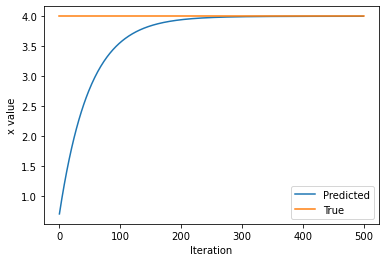

In [87]:
import matplotlib.pyplot as plt

plt.plot(history)
plt.plot([0, 500], [x_f, x_f])

plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')

# <span style="color:red">@@@@@@@@@@@@ Ayad @@@@@@@@@@@@</span>